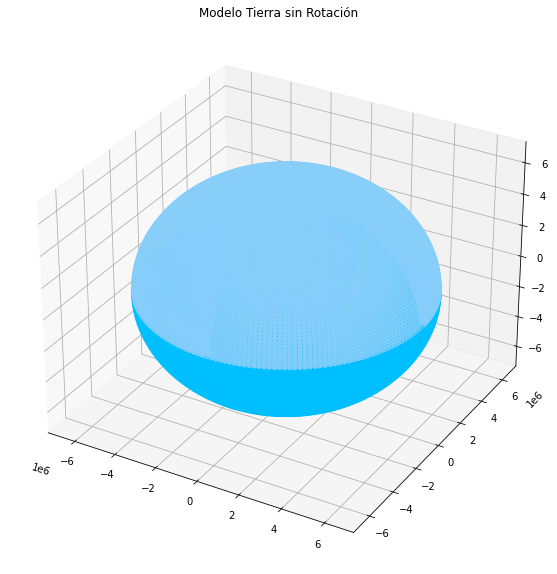

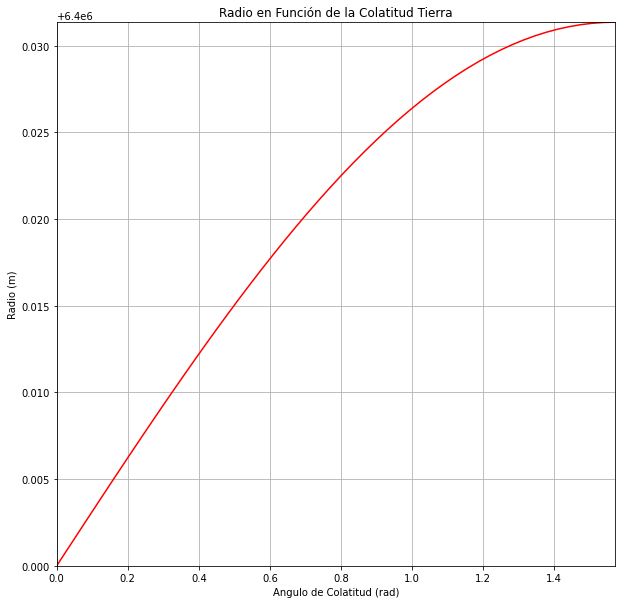

In [4]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def centrifuge (w, r, ph): #Esta función recibe la velocidad angular de la esfera de interés y retorna la magnitud del vector fuerza centrífuga calculada con la ecuación: Fc = m W x r x W. Se usa la definición de producto cruz: u x v = u*v*sin(phi)
    fc = np.abs((np.abs((np.abs(w)*np.abs(r)*np.sin(ph)))*np.abs(w)))
    return fc

def esfera(w0, r0): #Esta función genera la esfera, teniendo en cuenta el cambio en el radio debido a la fuerza cintrifuga en un punto de la esfera.
    theta = np.linspace(0,0.5*np.pi)
    phi = np.linspace(0,0.5*np.pi)
    fulltheta = np.linspace(0,2*np.pi)
    fullphi = np.linspace(0,np.pi)
    yo = []
    zo = []
    xo = []
    
    for i in theta:
        for j in phi:
            xo.append((r0*np.cos(i)*np.sin(j)) + centrifuge(w0,r0,j))
            yo.append((r0*np.sin(i)*np.sin(j)) + centrifuge(w0,r0,j))
            zo.append((r0*np.cos(j)) + centrifuge(w0,r0,j))
    x = np.array(xo)
    y = np.array(yo)
    z = np.array(zo)
    
    ro = []
    for i in phi:
        ro.append(centrifuge(w0,r0,i))
    roo = np.array(ro)
    radiorelativo = roo + r0
    
    plt.figure(figsize = (10,10))
    ax = plt.axes(projection = '3d')
    plt.title('Modelo Tierra sin Rotación')
    ax.scatter3D(x,y,-z, c='deepskyblue')
    ax.scatter3D(-x,y,-z, c='deepskyblue')
    ax.scatter3D(-x,-y,-z, c='deepskyblue')
    ax.scatter3D(x,-y,-z ,c='deepskyblue')
    ax.scatter3D(x,y,z,c='lightskyblue')
    ax.scatter3D(-x,y,z,c='lightskyblue')
    ax.scatter3D(-x,-y,z,c='lightskyblue')
    ax.scatter3D(x,-y,z,c='lightskyblue')
    plt.savefig('Rotación Cero.png')
    
    plt.figure(figsize = (10,10))
    plt.plot(phi, radiorelativo, c = 'r')
    plt.xlim(min(phi), max(phi))
    plt.ylim(r0, max(radiorelativo))
    plt.title('Radio en Función de la Colatitud Tierra')
    plt.ylabel('Radio (m)')
    plt.xlabel('Angulo de Colatitud (rad)')
    plt.grid()
    plt.savefig('Radio VS Colatitud Tierra')

# Con el siguiente comando llamamos a la función esfera(w0, r0) y le asignamos los valores deseados de velocidad angular y radio. En este caso ponemos los valores de la tierra: w0 = 7.3x10^-5 rad/s y r0 = 6400000 m.
esfera(0.00007, 6400000)